## Start of VCF Playground        

In [5]:
!pip install pandas matplotlib


Defaulting to user installation because normal site-packages is not writeable


  CHROM      POS         ID REF  ALT QUAL FILTER  \
0    19      111          .   A    C  9.6      .   
1    19      112          .   A    G   10      .   
2    20    14370  rs6054257   G    A   29   PASS   
3    20    17330          .   T    A    3    q10   
4    20  1110696  rs6040355   A  G,T   67   PASS   

                                INFO       FORMAT         NA00001  \
0                                  .        GT:HQ       0|0:10,10   
1                                  .        GT:HQ       0|0:10,10   
2            NS=3;DP=14;AF=0.5;DB;H2  GT:GQ:DP:HQ  0|0:48:1:51,51   
3                NS=3;DP=11;AF=0.017  GT:GQ:DP:HQ  0|0:49:3:58,50   
4  NS=2;DP=10;AF=0.333,0.667;AA=T;DB  GT:GQ:DP:HQ  1|2:21:6:23,27   

          NA00002       NA00003  
0       0|0:10,10       0/1:3,3  
1       0|0:10,10       0/1:3,3  
2  1|0:48:8:51,51  1/1:43:5:.,.  
3    0|1:3:5:65,3  0/0:41:3:.,.  
4    2|1:2:0:18,2  2/2:35:4:.,.  
Column names: Index(['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FI

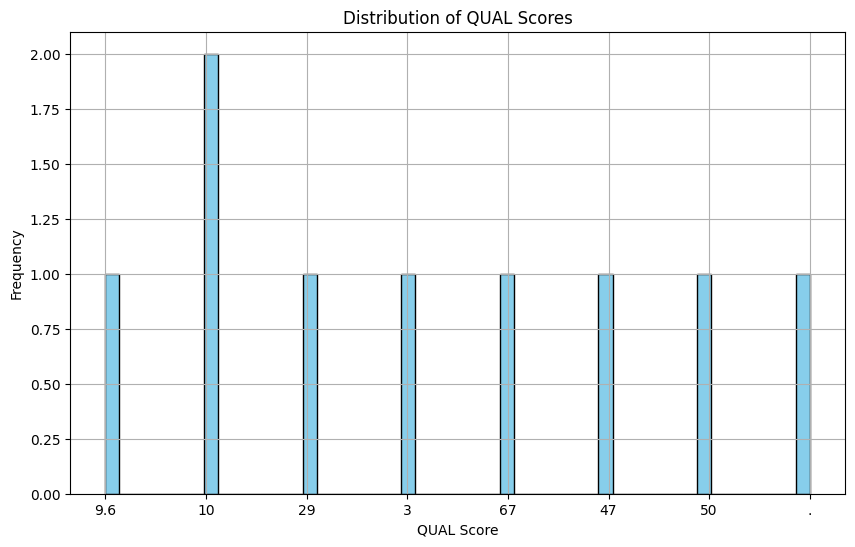

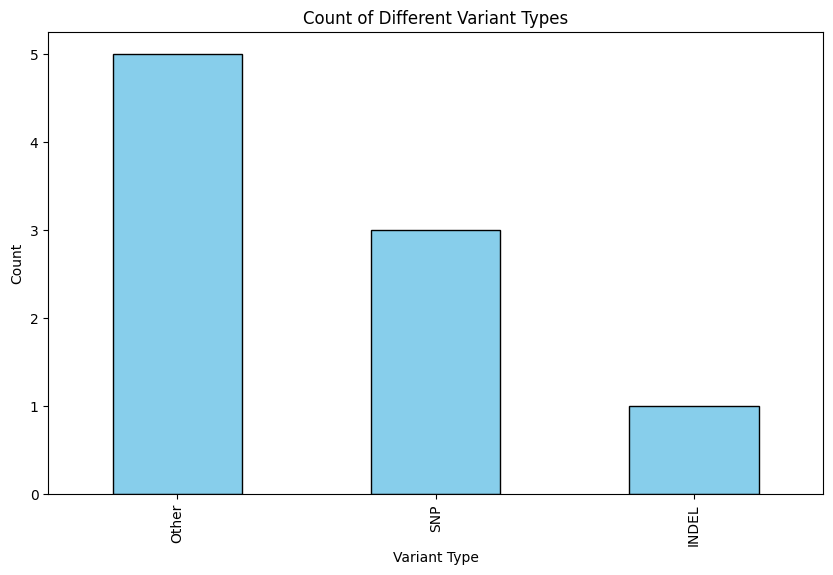

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the column names for the VCF file
column_names = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'NA00001', 'NA00002', 'NA00003']

# Read the VCF file, skipping metadata lines
vcf_file = pd.read_csv('sample.vcf', sep='\t', comment='#', names=column_names)

# Display the first few rows of the DataFrame
print(vcf_file.head())

# Debug: Print column names
print('Column names:', vcf_file.columns)

# Plot some initial insights
# Example: Distribution of QUAL scores
plt.figure(figsize=(10, 6))
plt.hist(vcf_file['QUAL'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of QUAL Scores')
plt.xlabel('QUAL Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Example: Count of different variant types (SNP, INDEL, etc.)
variant_types = vcf_file['ID'].apply(lambda x: 'SNP' if str(x).startswith('rs') else 'INDEL' if x != '.' else 'Other').value_counts()
plt.figure(figsize=(10, 6))
variant_types.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Different Variant Types')
plt.xlabel('Variant Type')
plt.ylabel('Count')
plt.show()

In [7]:
# A table print of the data
print(vcf_file)

  CHROM      POS         ID REF     ALT QUAL FILTER  \
0    19      111          .   A       C  9.6      .   
1    19      112          .   A       G   10      .   
2    20    14370  rs6054257   G       A   29   PASS   
3    20    17330          .   T       A    3    q10   
4    20  1110696  rs6040355   A     G,T   67   PASS   
5    20  1230237          .   T       .   47   PASS   
6    20  1234567  microsat1   G  GA,GAC   50   PASS   
7    20  1235237          .   T       .    .      .   
8     X       10     rsTest  AC   A,ATG   10   PASS   

                                INFO       FORMAT         NA00001  \
0                                  .        GT:HQ       0|0:10,10   
1                                  .        GT:HQ       0|0:10,10   
2            NS=3;DP=14;AF=0.5;DB;H2  GT:GQ:DP:HQ  0|0:48:1:51,51   
3                NS=3;DP=11;AF=0.017  GT:GQ:DP:HQ  0|0:49:3:58,50   
4  NS=2;DP=10;AF=0.333,0.667;AA=T;DB  GT:GQ:DP:HQ  1|2:21:6:23,27   
5                    NS=3;DP=13;AA=

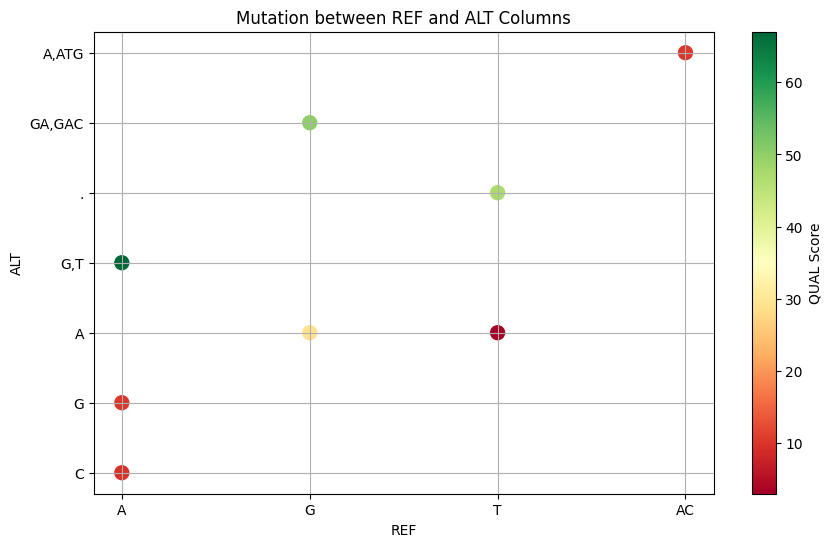

In [8]:
# Convert QUAL column to numeric, forcing errors to NaN
vcf_file['QUAL'] = pd.to_numeric(vcf_file['QUAL'], errors='coerce')

# Generate a scatter plot that visualizes the mutation between the REF and ALT columns with QUAL values as colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(vcf_file['REF'], vcf_file['ALT'], c=vcf_file['QUAL'], cmap='RdYlGn', s=100)  # Adjust the size with the 's' parameter
plt.colorbar(scatter, label='QUAL Score')
plt.title('Mutation between REF and ALT Columns')
plt.xlabel('REF')
plt.ylabel('ALT')
plt.grid(True)
plt.show()


In [9]:
# Pretty print html table with the first 10 rows
print(vcf_file.head(10).to_html())
# and render
from IPython.display import HTML
HTML(vcf_file.head(10).to_html())


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CHROM</th>
      <th>POS</th>
      <th>ID</th>
      <th>REF</th>
      <th>ALT</th>
      <th>QUAL</th>
      <th>FILTER</th>
      <th>INFO</th>
      <th>FORMAT</th>
      <th>NA00001</th>
      <th>NA00002</th>
      <th>NA00003</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>19</td>
      <td>111</td>
      <td>.</td>
      <td>A</td>
      <td>C</td>
      <td>9.6</td>
      <td>.</td>
      <td>.</td>
      <td>GT:HQ</td>
      <td>0|0:10,10</td>
      <td>0|0:10,10</td>
      <td>0/1:3,3</td>
    </tr>
    <tr>
      <th>1</th>
      <td>19</td>
      <td>112</td>
      <td>.</td>
      <td>A</td>
      <td>G</td>
      <td>10.0</td>
      <td>.</td>
      <td>.</td>
      <td>GT:HQ</td>
      <td>0|0:10,10</td>
      <td>0|0:10,10</td>
      <td>0/1:3,3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>20</td>
      <td>14370</td>
      <td>rs6

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NA00001,NA00002,NA00003
0,19,111,.,A,C,9.6,.,.,GT:HQ,"0|0:10,10","0|0:10,10","0/1:3,3"
1,19,112,.,A,G,10.0,.,.,GT:HQ,"0|0:10,10","0|0:10,10","0/1:3,3"
2,20,14370,rs6054257,G,A,29.0,PASS,NS=3;DP=14;AF=0.5;DB;H2,GT:GQ:DP:HQ,"0|0:48:1:51,51","1|0:48:8:51,51","1/1:43:5:.,."
3,20,17330,.,T,A,3.0,q10,NS=3;DP=11;AF=0.017,GT:GQ:DP:HQ,"0|0:49:3:58,50","0|1:3:5:65,3","0/0:41:3:.,."
4,20,1110696,rs6040355,A,"G,T",67.0,PASS,"NS=2;DP=10;AF=0.333,0.667;AA=T;DB",GT:GQ:DP:HQ,"1|2:21:6:23,27","2|1:2:0:18,2","2/2:35:4:.,."
5,20,1230237,.,T,.,47.0,PASS,NS=3;DP=13;AA=T,GT:GQ:DP:HQ,"0|0:54:.:56,60","0|0:48:4:51,51","0/0:61:2:.,."
6,20,1234567,microsat1,G,"GA,GAC",50.0,PASS,"NS=3;DP=9;AA=G;AN=6;AC=3,1",GT:GQ:DP,0/1:.:4,0/2:17:2,1/1:40:3
7,20,1235237,.,T,.,NaN,.,.,GT,0/0,0|0,./.
8,X,10,rsTest,AC,"A,ATG",10.0,PASS,.,GT,0,0/1,0|2
